In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

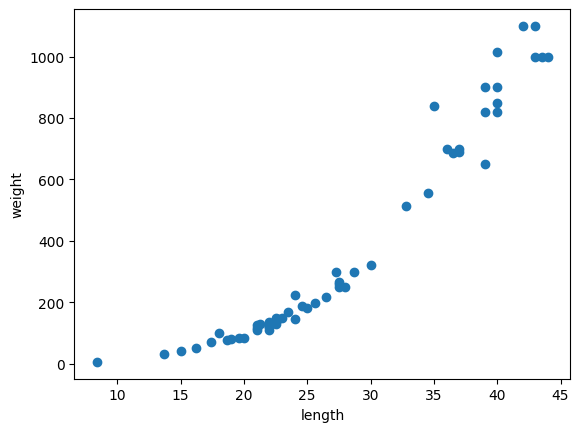

In [4]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state = 42)

In [33]:
X_train.shape

(42,)

In [34]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [35]:
knr = KNeighborsRegressor()

In [37]:
knr.fit(X_train, y_train)

KNeighborsRegressor()

In [38]:
knr.score(X_test, y_test)

0.992809406101064

In [42]:
test_predict = knr.predict(X_test)
mae = mean_absolute_error(y_test, test_predict)

In [43]:
mae

19.157142857142862

In [46]:
#과소적합
knr.score(X_train, y_train)

0.9698823289099254

In [47]:
knr.n_neighbors = 3
knr.fit(X_train, y_train)
knr.score(X_train, y_train)

0.9804899950518966

In [48]:
knr.score(X_test, y_test)

0.9746459963987609

In [51]:
###문제점
knr.predict([[50]])

array([1033.33333333])

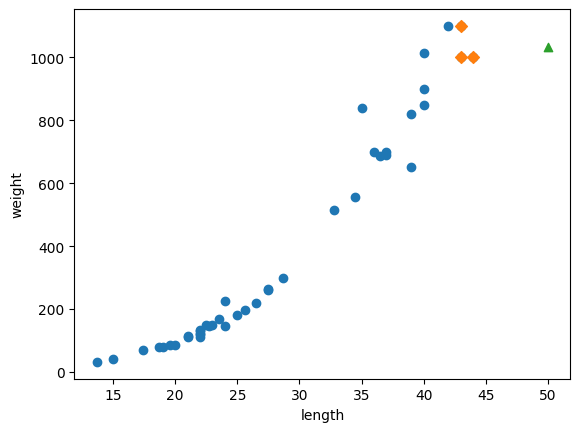

In [57]:
distance, idx = knr.kneighbors([[50]])
plt.scatter(X_train, y_train)
plt.scatter(X_train[idx], y_train[idx], marker = 'D')

plt.scatter(50,  1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

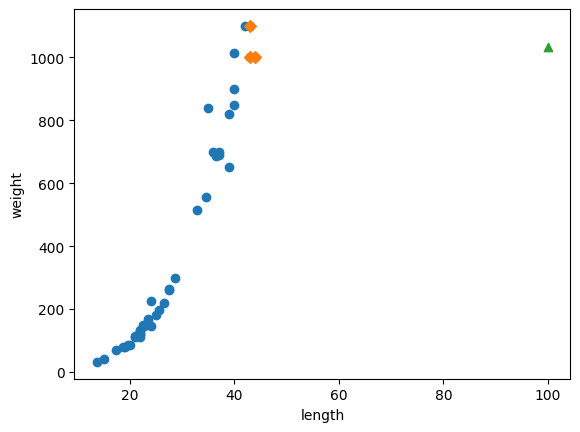

In [58]:
distance, idx = knr.kneighbors([[100]])
plt.scatter(X_train, y_train)
plt.scatter(X_train[idx], y_train[idx], marker = 'D')

plt.scatter(100,  1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [55]:
#knn 최근접 이웃 회귀는 가까운 샘플의 평균을 찾는다.
knr.predict([[100]]) # 50과 100 모두 1000g정도로 예측한다 

array([1033.33333333])